In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from bayes_opt import BayesianOptimization

In [6]:
ftalany_class = pd.read_excel('ftalany_klasyfikacjaDT.xlsx', sheet_name=['X_train', 'y_train', 'X_test', 'y_test'])
Xt = ftalany_class['X_train']
Yt = ftalany_class['y_train']
Xv = ftalany_class['X_test']
Yv = ftalany_class['y_test']
Xt = Xt.rename(columns={"qc-": "qc"})
Xv = Xv.rename(columns={"qc-": "qc"})

In [7]:
correlation_matrix = Xt.cov().corr()

W zbiorze treningowym w Yt jest 13 obiektów zaklasyfikowanych do 2 kategorii (daje to 13/23) i 10 zaklasyfikowanych do 1 kategorii (co daje 10/23).

In [8]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(Xt, Yt)

[Text(0.6, 0.8333333333333334, 'x[2] <= 0.017\ngini = 0.491\nsamples = 23\nvalue = [10.0, 13.0]'),
 Text(0.4, 0.5, 'x[3] <= -0.156\ngini = 0.278\nsamples = 12\nvalue = [10, 2]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.7, 0.6666666666666667, '  False')]

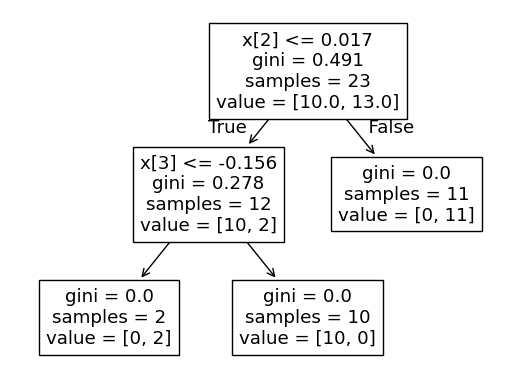

In [9]:
tree.plot_tree(clf)

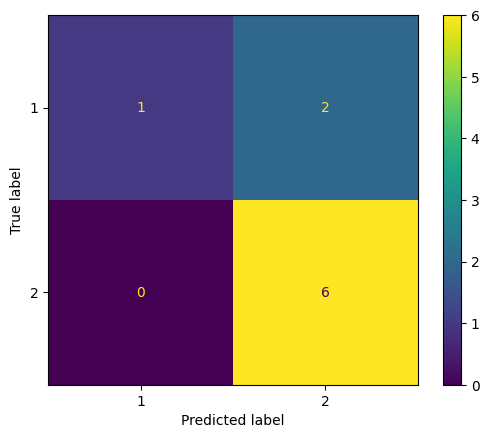

In [10]:
conmat = confusion_matrix(Yv, clf.predict(Xv))
conmandis = ConfusionMatrixDisplay(confusion_matrix=conmat, display_labels=clf.classes_)
conmandis.plot()
plt.show()

In [11]:
tn, fp, fn, tp = conmat.ravel()
print(f'Sensivity = {tp/(tp+fn)}\nSpecificity = {tn/(fp+tn)}\nPrecision = {tp/(tp+fp)}\nF1 = {(2*tp)/(2*tp+fp+fn)}\nBalanced accuracy = {((tp/(tp+fn))+(tn/(tp+tn))/2)}\nBalanced error = {1 - ((tp/(tp+fn))+(tn/(tp+tn))/2)}')

Sensivity = 1.0
Specificity = 0.3333333333333333
Precision = 0.75
F1 = 0.8571428571428571
Balanced accuracy = 1.0714285714285714
Balanced error = -0.0714285714285714


Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max

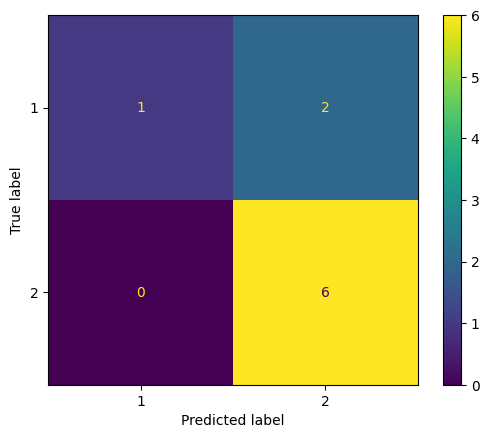

In [12]:
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the DecisionTreeClassifier
dt = tree.DecisionTreeClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(Xt, Yt.values.ravel())

# Print the best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

# Use the best estimator to make predictions
best_clf = grid_search.best_estimator_
Yv_pred = best_clf.predict(Xv)

# Evaluate the best estimator
conmat_best = confusion_matrix(Yv, Yv_pred)
conmandis_best = ConfusionMatrixDisplay(confusion_matrix=conmat_best, display_labels=best_clf.classes_)
conmandis_best.plot()
plt.show()

|   iter    |  target   | criterion | max_depth | min_sa... | min_sa... |
-------------------------------------------------------------------------
| 1         | 0.7778    | 0.3745    | 29.01     | 3.196     | 6.789     |
| 2         | 0.7778    | 0.156     | 13.12     | 1.174     | 8.929     |
| 3         | 0.7778    | 0.6011    | 24.16     | 1.062     | 9.759     |
| 4         | 0.7778    | 0.8324    | 14.25     | 1.545     | 3.467     |
| 5         | 0.7778    | 0.3042    | 20.5      | 2.296     | 4.33      |
| 6         | 0.7778    | 0.6119    | 12.79     | 1.876     | 4.931     |
| 7         | 0.7778    | 0.4561    | 25.7      | 1.599     | 6.114     |
| 8         | 0.7778    | 0.5924    | 10.93     | 2.823     | 3.364     |
| 9         | 0.7778    | 0.06505   | 28.98     | 3.897     | 8.467     |
| 10        | 0.7778    | 0.3046    | 11.95     | 3.053     | 5.521     |
| 11        | 0.7778    | 0.595     | 29.97     | 3.833     | 2.021     |
| 12        | 0.7778    | 0.1211    | 

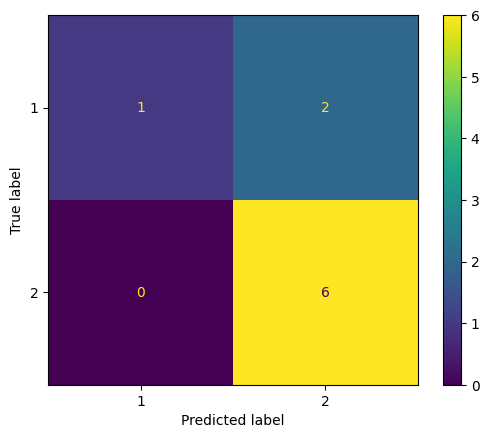

In [18]:
# Define the function to optimize
def optimize_dt(criterion, max_depth, min_samples_split, min_samples_leaf):
    criterion = 'gini' if criterion < 0.5 else 'entropy'
    dt = tree.DecisionTreeClassifier(
        criterion=criterion,
        max_depth=int(max_depth),
        min_samples_split=int(min_samples_split),
        min_samples_leaf=int(min_samples_leaf)
    )
    dt.fit(Xt, Yt.values.ravel())
    return dt.score(Xv, Yv.values.ravel())

# Define the parameter bounds
param_bounds = {
    'criterion': (0, 1),  # 0 for 'gini', 1 for 'entropy'
    'max_depth': (10, 30),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 4)
}

# Initialize Bayesian Optimization
optimizer = BayesianOptimization(
    f=optimize_dt,
    pbounds=param_bounds,
    random_state=42
)

# Perform optimization
optimizer.maximize(init_points=10, n_iter=30)

# Extract the best parameters
best_params = optimizer.max['params']
best_params['criterion'] = 'gini' if best_params['criterion'] < 0.5 else 'entropy'
best_params['max_depth'] = int(best_params['max_depth'])
best_params['min_samples_split'] = int(best_params['min_samples_split'])
best_params['min_samples_leaf'] = int(best_params['min_samples_leaf'])

print(f"Best parameters: {best_params}")

# Use the best parameters to train the final model
best_clf_bayes = tree.DecisionTreeClassifier(**best_params)
best_clf_bayes.fit(Xt, Yt.values.ravel())

# Make predictions and evaluate
Yv_pred_bayes = best_clf_bayes.predict(Xv)
conmat_bayes = confusion_matrix(Yv, Yv_pred_bayes)
conmandis_bayes = ConfusionMatrixDisplay(confusion_matrix=conmat_bayes, display_labels=best_clf_bayes.classes_)
conmandis_bayes.plot()
plt.show()